In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt  
import datetime
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
os.getcwd()
os.chdir("D:\\datasets\\Test")

In [3]:
cotton_farmers_data= pd.read_csv("Cotton_takehome_test.csv")

In [4]:
cotton_farmers_data.shape

(100000, 8)

In [5]:
cotton_farmers_data.head()

,crop,created_on,query_type,query_text_raw,state_name,district_name,GPS,7d_rainfall
0,cotton,1/5/15 19:14,plant protection,how to control thirips in cotton crop ?,haryana,fatehabad,29.54-75.71,65.495691
1,cotton,10/11/16 09:35,plant protection,larvae sucking pests,gujarat,ahmadabad,22.38-71.98,16.142093
2,cotton,24/5/16 20:20,varieties,improved varieties of bt cotton ?,haryana,sonepat,28.99-77.02,108.803134
3,cotton,26/10/17 00:00,agriculture mechanization,reddning of cotton ?,maharashtra,ahmadnagar,19.23-74.65,82.461657
4,cotton,29/5/17 13:25,nutrient management,tell me nutrient management ?,rajasthan,nagaur,27.15-74.86,44.846969


In [6]:
#checking the target field and others
cotton_farmers_data.columns

Index(['crop', 'created_on', 'query_type', 'query_text_raw', 'state_name',
       'district_name', 'GPS', '7d_rainfall'],
      dtype='object')

In [7]:
cotton_farmers_data.query_type.value_counts()

plant protection                    46974
fertilizer use and availability     10481
market information                   9514
varieties                            5660
cultural practices                   5571
nutrient management                  5007
biopesticides and biofertilizers     4903
seeds                                4807
field preparation                    2615
agriculture mechanization            1958
weed management                       727
government schemes                    410
sowing time and weather               339
water management                      229
soil testing                          177
crop insurance                        108
bio                                   102
training and exposure visits           44
credit                                 43
organic farming                        31
power, roads etc.                      29
seeds and planting material            24
post harvest preservation              18
storage                           

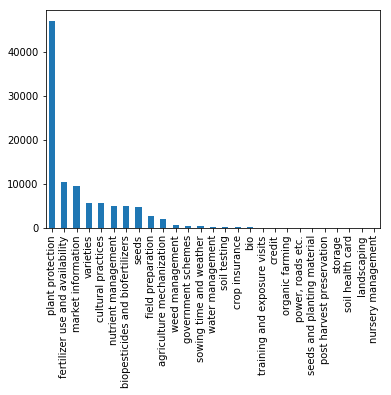

In [8]:
cotton_farmers_data.query_type.value_counts().plot.bar()

In [9]:
cotton_farmers_data.head()

,crop,created_on,query_type,query_text_raw,state_name,district_name,GPS,7d_rainfall
0,cotton,1/5/15 19:14,plant protection,how to control thirips in cotton crop ?,haryana,fatehabad,29.54-75.71,65.495691
1,cotton,10/11/16 09:35,plant protection,larvae sucking pests,gujarat,ahmadabad,22.38-71.98,16.142093
2,cotton,24/5/16 20:20,varieties,improved varieties of bt cotton ?,haryana,sonepat,28.99-77.02,108.803134
3,cotton,26/10/17 00:00,agriculture mechanization,reddning of cotton ?,maharashtra,ahmadnagar,19.23-74.65,82.461657
4,cotton,29/5/17 13:25,nutrient management,tell me nutrient management ?,rajasthan,nagaur,27.15-74.86,44.846969


In [10]:
#checking the missing values 
cotton_farmers_data.isnull().sum()

crop                14
created_on          10
query_type         206
query_text_raw      10
state_name           7
district_name        3
GPS               3144
7d_rainfall         11
dtype: int64

In [11]:
cotton_farmers_data2=cotton_farmers_data.copy()

In [12]:
#droping na values for visualization purpose 
cotton_farmers_data.dropna(inplace=True)

In [13]:
cotton_farmers_data.isnull().sum()

crop              0
created_on        0
query_type        0
query_text_raw    0
state_name        0
district_name     0
GPS               0
7d_rainfall       0
dtype: int64

In [14]:
## extracting year, month and date from date-time column
cotton_farmers_data['date'] = pd.to_datetime(cotton_farmers_data['created_on'], errors='coerce')
cotton_farmers_data['year'] = pd.DatetimeIndex(cotton_farmers_data['created_on']).year
cotton_farmers_data['month'] = pd.DatetimeIndex(cotton_farmers_data['created_on']).month
cotton_farmers_data['day'] = pd.DatetimeIndex(cotton_farmers_data['created_on']).day

In [15]:
#sorting the date column
cotton_farmers_data=cotton_farmers_data.sort_values(['year', 'month', 'day', 'state_name', 'district_name'])

cotton_farmers_data.head()

,crop,created_on,query_type,query_text_raw,state_name,district_name,GPS,7d_rainfall,date,year,month,day
22065,cotton,1/5/10 11:43,fertilizer use and availability,ask about fertiliser in cotton,gujarat,anand,22.56-72.93,59.084406,2010-01-05 11:43:00,2010,1,5
47000,cotton,1/6/10 10:14,water management,tell me first irrigation in bt cotton,rajasthan,ganganagar,29.9-73.88,78.211623,2010-01-06 10:14:00,2010,1,6
10763,cotton,1/7/10 12:09,fertilizer use and availability,ask about fertilizer in cotton,gujarat,junagadh,21.52-70.46,55.656492,2010-01-07 12:09:00,2010,1,7
15869,cotton,1/7/10 16:59,fertilizer use and availability,asking about fertiizer dose of cotton.,gujarat,narmada,21.75-72.17,68.562876,2010-01-07 16:59:00,2010,1,7
11680,cotton,1/8/10 18:47,fertilizer use and availability,ask about the fertilizer in cotton.,gujarat,rajkot,22.3-70.8,66.695495,2010-01-08 18:47:00,2010,1,8


In [16]:
#Check if there are duplicates first by ticker, cik and filing_Date
duplicate_bool = cotton_farmers_data.duplicated(subset=['created_on','state_name', 'district_name', 'query_type' , 'query_text_raw'], keep='first')
duplicate = cotton_farmers_data.loc[duplicate_bool == True]
print(duplicate)

         crop      created_on                       query_type  \
87735  cotton  30/10/10 17:20  fertilizer use and availability   
59780  cotton   22/8/11 16:15                 plant protection   
95168  cotton    3/5/13 16:59                 plant protection   
27479  cotton    3/6/13 18:30                field preparation   
88052  cotton    3/7/13 12:45  fertilizer use and availability   
...       ...             ...                              ...   
47837  cotton   31/1/19 00:00               market information   
22358  cotton   13/2/19 00:00               market information   
99960  cotton   24/2/19 00:00               market information   
70136  cotton    9/1/19 15:52                   crop insurance   
52412  cotton   11/2/19 00:00               market information   

                                   query_text_raw      state_name  \
87735                  control of mgso4 in cotton  andhra pradesh   
59780                    stunted growth of cotton     maharashtra   


There are 353 duplicate records at Call DateTimestamp, State and District, Query type and Query_raw_text.
It could be possible that multiple farmers had similar reason to call at the same time. Hence ignoring the duplicates and no action taken

In [17]:
# data check 
contingency_table = pd.crosstab(
    cotton_farmers_data['query_type'],
    cotton_farmers_data['month'],
    margins = True
)
contingency_table

month,1,2,3,4,5,6,7,8,9,10,11,12,All
query_type,,,,,,,,,,,,,
agriculture mechanization,86,64,62,114,177,163,246,341,330,170,91,87,1931
bio,5,1,3,5,3,3,2,2,15,27,24,12,102
biopesticides and biofertilizers,151,150,168,262,403,348,948,1200,624,227,215,156,4852
credit,1,1,2,4,7,2,3,5,5,2,3,1,36
crop insurance,1,3,2,9,8,9,22,12,11,7,18,4,106
cultural practices,237,212,235,487,957,641,611,681,495,351,271,212,5390
fertilizer use and availability,420,422,423,563,683,1273,1652,1542,1273,866,590,490,10197
field preparation,121,121,135,271,335,240,301,290,292,155,129,125,2515
government schemes,26,18,19,43,57,32,32,30,46,27,36,37,403


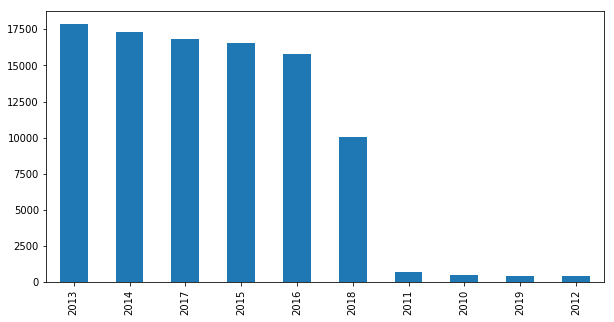

In [18]:
# Let's see the distribution of data by year
cotton_farmers_data['year'].value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))


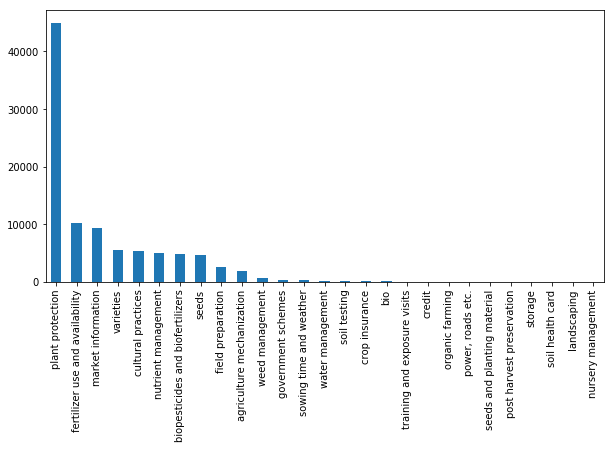

In [19]:

# Let's plot the target column  i.e. Query type - category
cotton_farmers_data['query_type'].value_counts().plot(kind='bar', figsize=(10,5))


There seems to be many categories that are scarcely available inthe data.
Plant/Crop/Fertilizer/Nutrients related are the frequent made calls

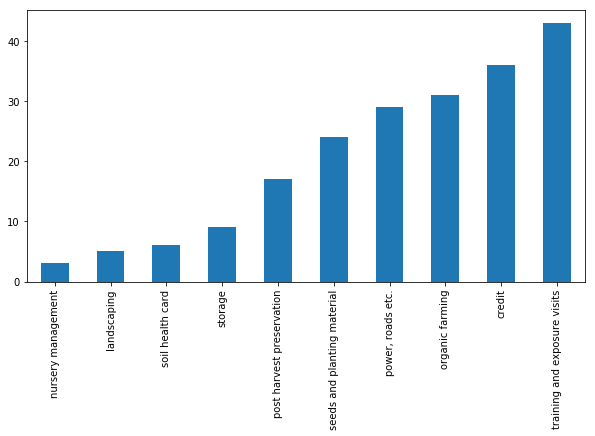

In [20]:
#Now let's plot the least queried category calls 
cotton_farmers_data['query_type'].value_counts().nsmallest(10).plot(kind='bar',figsize=(10,5))

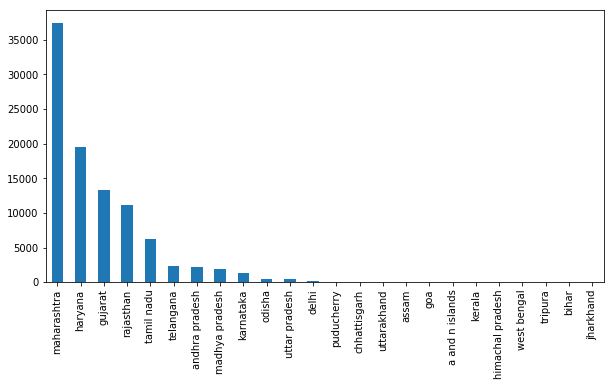

In [21]:
#Let's plot the distribution of States by calls received
cotton_farmers_data['state_name'].value_counts().plot(kind='bar', figsize=(10,5))

Maharastra contributes for more than one-third of the calls
Similarly Haryana and Gujarat comibined for another one-third
Rajasthan just around 13%,
Rest of the contribution is majorly from Tamil Nadu, Telangana, Andhra PRadesh  and Karnataka
Rest of the states not mentioned above rarely call.


With the above plots, it's imperative that there are some query categories whose information is not available at extent that helps to predict. Hence limiting the prediction to the queries where we have atleast 5000 number of calls.
Not much analysis is done to decide these cut-offs, just look from the plots.
Also YARA being a chemicals company, the area of interest is assumed to be Plant protection, Fertilizers and pesticies

Similarly states and yearly data with lesser contribution are getting excluded with below cut-offs

#filtering out the states by value_counts <1000 
data_1 = data[data['state_name'].map(data['state_name'].value_counts()) > 1000]
#Filtering out  the year data by value_counts < 2500 
data_2 = data_1[data_1['year'].map(data_1['year'].value_counts()) > 2500]
#filterinng the target coulumn by value_counts < 1000
data = data_2[data_2['query_type'].map(data_2['query_type'].value_counts()) > 1000]

In [22]:
cotton_farmers_data3=cotton_farmers_data.copy()

In [23]:
#filterinng the target coulumn by value_counts < 1000 
data1 = cotton_farmers_data[cotton_farmers_data['query_type'].map(cotton_farmers_data['query_type'].value_counts()) > 1000]

In [24]:
#Filtering out the year data by value_counts < 2500 
data2 = data1[data1['year'].map(data1['year'].value_counts()) > 2500]

In [25]:
#filtering out the states by value_counts <1000 
data3 = data2[data2['state_name'].map(data2['state_name'].value_counts()) > 1000]

In [26]:
print(data3.shape)

(91074, 12)


In [27]:
#Which categories of calls co-occur at the same time of year?
q1_table = pd.crosstab(
    data3['query_type'],
    data3['month'],
    margins = True
)
q1_table

month,1,2,3,4,5,6,7,8,9,10,11,12,All
query_type,,,,,,,,,,,,,
agriculture mechanization,72,56,55,105,175,158,244,303,312,160,86,79,1805
biopesticides and biofertilizers,151,150,168,262,402,347,947,1198,624,227,215,156,4847
cultural practices,224,202,214,460,895,584,580,645,466,337,260,201,5068
fertilizer use and availability,368,369,383,501,557,1081,1402,1345,1157,786,533,412,8894
field preparation,115,120,134,265,332,230,296,286,291,153,127,124,2473
market information,1298,955,703,910,562,460,433,381,411,744,818,1405,9080
nutrient management,215,214,244,282,279,360,580,871,727,449,346,263,4830
plant protection,1773,1603,1611,1956,2551,2968,5986,9127,8113,3526,2741,2014,43969
seeds,161,202,253,978,1509,486,204,179,171,176,150,152,4621


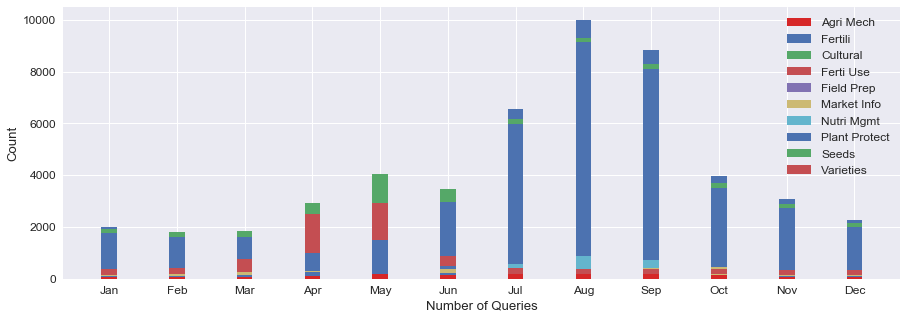

In [28]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

#Assigns the frequency values
agri_mech = q1_table.iloc[0][0:12].values
fert_pest = q1_table.iloc[1][0:12].values
cultural = q1_table.iloc[2][0:12].values
ferti_use = q1_table.iloc[3][0:12].values
field_prep =q1_table.iloc[4][0:12].values
market_info = q1_table.iloc[5][0:12].values
nutri_mgmt =q1_table.iloc[6][0:12].values
plant_protect=q1_table.iloc[7][0:12].values
seeds = q1_table.iloc[8][0:12].values
varieties = q1_table.iloc[9][0:12].values

#Plots the bar chart
fig = plt.figure(figsize=(15, 5))
sns.set(font_scale=1.2)
categories = ["Jan", "Feb",	"Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec" ]
p1 = plt.bar(categories, agri_mech, 0.23, color='#d62728')
p2 = plt.bar(categories, fert_pest, 0.23, bottom=agri_mech)
p3 = plt.bar(categories, cultural, 0.23, bottom=fert_pest)
p4 = plt.bar(categories, ferti_use, 0.23, bottom=cultural)
p5 = plt.bar(categories, field_prep, 0.23, bottom=ferti_use)
p6 = plt.bar(categories, market_info, 0.23, bottom=field_prep)
p7 = plt.bar(categories, nutri_mgmt, 0.23, bottom=market_info)
p8 = plt.bar(categories, plant_protect, 0.23, bottom=nutri_mgmt)
p9 = plt.bar(categories, seeds, 0.23, bottom=plant_protect)
p10 = plt.bar(categories, varieties, 0.23, bottom=seeds)
plt.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0],p7[0], p8[0],p9[0], p10[0]), ('Agri Mech', 'Fertili', 'Cultural', 'Ferti Use', 'Field Prep','Market Info','Nutri Mgmt','Plant Protect','Seeds','Varieties'))
plt.xlabel('Number of Queries')
plt.ylabel('Count')
plt.show()

### Question 1
•	Which categories of calls co-occur at the same time of year?

### Answer 1
Plant Protect, Varieties and Seeds are the most common co-occuring Queries.
The proportion of these calls are almost equivalent to each other during May month. And then gradually Plant protection queries take lead from June onwards with Jul, Aug and Sep having maximum queries.


In [29]:
june17_data = cotton_farmers_data.query('year=="2017" & month=="6" ')

In [30]:
june17_data.query_type.value_counts()

plant protection                    455
fertilizer use and availability     168
market information                  113
varieties                           103
nutrient management                  94
cultural practices                   78
weed management                      63
biopesticides and biofertilizers     48
field preparation                    21
agriculture mechanization            19
seeds                                18
government schemes                    8
sowing time and weather               5
bio                                   3
soil testing                          1
seeds and planting material           1
Name: query_type, dtype: int64

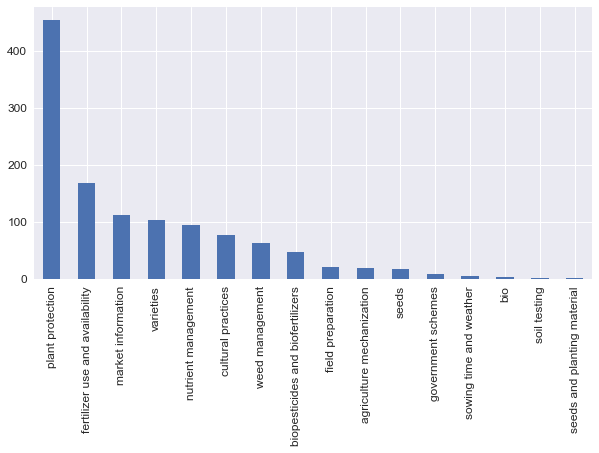

In [31]:
june17_data['query_type'].value_counts().plot(kind='bar', figsize=(10,5))

### Question 2
•	What are farmers interested induring June 2017?
### Answer 2
Majority of the Farmers are interested in querying about Plant protection during June 2017, followed by Fertilizer use and availablility, market information, varieties, nurtient management, cultural practices, weed management, biopesticides and fertilizers respectively.

In [32]:
data3.dtypes

crop                      object
created_on                object
query_type                object
query_text_raw            object
state_name                object
district_name             object
GPS                       object
7d_rainfall              float64
date              datetime64[ns]
year                       int64
month                      int64
day                        int64
dtype: object

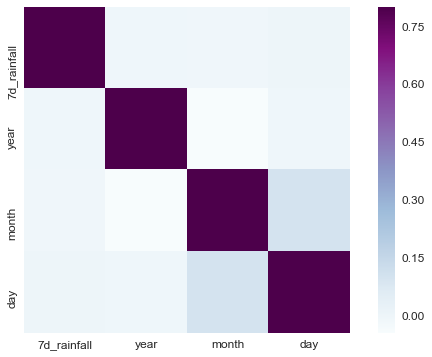

In [33]:
# correlation plot
matrix = data3.corr() 
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

 ## modelling

In [34]:
data3.head()

,crop,created_on,query_type,query_text_raw,state_name,district_name,GPS,7d_rainfall,date,year,month,day
58119,cotton,1/1/13 12:48,fertilizer use and availability,fertilizer,maharashtra,chandrapur,19.74-78.99,1.862749,2013-01-01 12:48:00,2013,1,1
65959,cotton,1/1/13 09:55,fertilizer use and availability,fertilizer dose for cotton fardad,maharashtra,wardha,20.75-78.6,22.878842,2013-01-01 09:55:00,2013,1,1
4519,cotton,1/1/13 07:46,fertilizer use and availability,fertilizer management in cotton,tamil nadu,dindigul,10.37-77.98,66.253425,2013-01-01 07:46:00,2013,1,1
12592,cotton,1/4/13 14:36,cultural practices,ask abt cotton crop?,gujarat,junagadh,21.16-70.31,8.812781,2013-01-04 14:36:00,2013,1,4
19606,cotton,1/5/13 19:43,cultural practices,junagadh agricultural university.,gujarat,junagadh,21.55-70.7,17.186766,2013-01-05 19:43:00,2013,1,5


In [35]:
data3.shape

(91074, 12)

In [36]:
col=["created_on","GPS","crop"]
data3.drop(col,inplace=True,axis=1)

In [37]:
data3.shape

(91074, 9)

In [38]:
data3.head(2)

,query_type,query_text_raw,state_name,district_name,7d_rainfall,date,year,month,day
58119,fertilizer use and availability,fertilizer,maharashtra,chandrapur,1.862749,2013-01-01 12:48:00,2013,1,1
65959,fertilizer use and availability,fertilizer dose for cotton fardad,maharashtra,wardha,22.878842,2013-01-01 09:55:00,2013,1,1


Text(0,0.5,'Percentage')

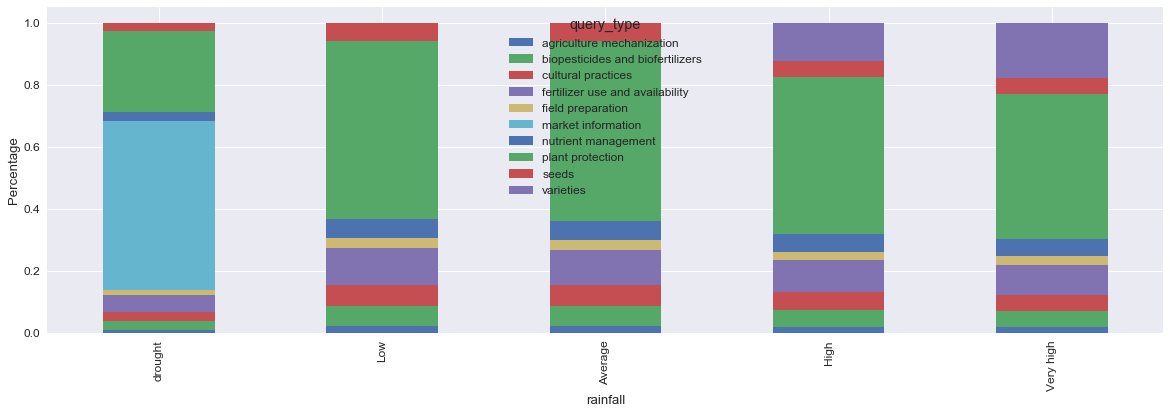

In [39]:
bins=[0,10,30,60,80,110] 
group=["drought",'Low','Average','High', 'Very high'] 
data3['rain_bin']=pd.cut(data3['7d_rainfall'],bins,labels=group) #cut helps segmenting and sorting of data
rain_bin=pd.crosstab(data3['rain_bin'],data3['query_type']) 
rain_bin.div(rain_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20,6)) 
plt.xlabel('rainfall') 
plt.ylabel('Percentage')

In [40]:
col_1=["year","day","7d_rainfall"]
data3.drop(col_1,inplace=True,axis=1)

In [41]:
data3.head()

,query_type,query_text_raw,state_name,district_name,date,month,rain_bin
58119,fertilizer use and availability,fertilizer,maharashtra,chandrapur,2013-01-01 12:48:00,1,drought
65959,fertilizer use and availability,fertilizer dose for cotton fardad,maharashtra,wardha,2013-01-01 09:55:00,1,Low
4519,fertilizer use and availability,fertilizer management in cotton,tamil nadu,dindigul,2013-01-01 07:46:00,1,High
12592,cultural practices,ask abt cotton crop?,gujarat,junagadh,2013-01-04 14:36:00,1,drought
19606,cultural practices,junagadh agricultural university.,gujarat,junagadh,2013-01-05 19:43:00,1,Low


### Label Encoding the Categorical Features

In [42]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
lb_make = preprocessing.LabelEncoder() 
  
# Encode labels in columns 

data3['query_typ_Code'] = lb_make.fit_transform(data3['query_type'])
data3['query_text_raw_Code'] = lb_make.fit_transform(data3['query_text_raw'])
data3['state_name_Code'] = lb_make.fit_transform(data3['state_name'])
data3['district_name_Code'] = lb_make.fit_transform(data3['district_name'])
data3['state_name_Code'] = lb_make.fit_transform(data3['state_name'])
data3['rain_bin_Code'] = lb_make.fit_transform(data3['rain_bin'])

In [43]:
col=["query_type","query_text_raw","state_name","district_name","date","month","rain_bin"]
data3.drop(col,axis=1,inplace=True)

### train test split

In [44]:
y=data3["query_typ_Code"]
X=data3.drop("query_typ_Code",axis=1)

In [45]:
data3.head()

,query_typ_Code,query_text_raw_Code,state_name_Code,district_name_Code,rain_bin_Code
58119,3,6778,5,45,4
65959,3,6825,5,231,2
4519,3,6938,7,67,1
12592,2,901,1,106,4
19606,2,9612,1,106,2


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=123)

### Feature Scaling of Training and Testing Data

In [47]:
X_Train = preprocessing.scale(X_train)
X_Test = preprocessing.scale(X_test)

### Fitting data into Decision Tree Classifier Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

### Predicting with Test Data

In [49]:
y_pred = clf_gini.predict(X_test)

### Evaluating the Classifier

In [50]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[   0    0    0    0    0   10    0  369    0    0]
 [   0    0    0    0    0   11    0  951    0    1]
 [   0    0    0    0    0   14    0  989    0    1]
 [   0    0    0    0    0  122    0 1641    0    0]
 [   0    0    0    0    0   18    0  503    0    0]
 [   0    0    0    0    0 1635    0  152    0    0]
 [   0    0    0    0    0   64    0  943    0    1]
 [   0    0    0    0    0  339    0 8432    0    4]
 [   0    0    0    0    0   14    0  875    0   64]
 [   0    0    0    0    0    0    0  797    0  265]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       379
           1       0.00      0.00      0.00       963
           2       0.00      0.00      0.00      1004
           3       0.00      0.00      0.00      1763
           4       0.00      0.00      0.00       521
           5       0.73      0.91      0.81      1787
           6       0.00      0.00      0.00      1008
           7       0.54      0.96   

In [51]:
y_pred = clf_gini.predict(X_train)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix   
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1426
           1       0.00      0.00      0.00      3884
           2       0.00      0.00      0.00      4064
           3       0.00      0.00      0.00      7131
           4       0.00      0.00      0.00      1952
           5       0.74      0.93      0.83      7293
           6       0.00      0.00      0.00      3822
           7       0.54      0.96      0.69     35194
           8       0.00      0.00      0.00      3668
           9       0.78      0.24      0.37      4425

    accuracy                           0.57     72859
   macro avg       0.21      0.21      0.19     72859
weighted avg       0.38      0.57      0.44     72859



In [57]:
#!pip install lightgbm

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [78]:
import random
import lightgbm as lgb

# Evaluation of the model
from sklearn.model_selection import KFold
MAX_EVALS = 500
N_FOLDS = 10

In [59]:
model = lgb.LGBMClassifier()
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10))
}

# Subsampling (only applicable with 'goss')
subsample_dist = list(np.linspace(0.5, 1, 100))

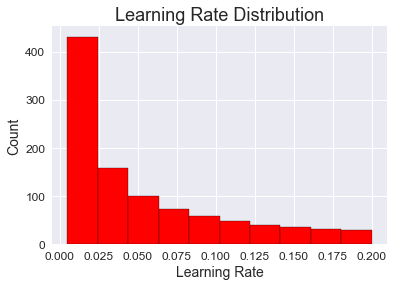

In [61]:
plt.hist(param_grid['learning_rate'], color = 'r', edgecolor = 'k');
plt.xlabel('Learning Rate', size = 14); plt.ylabel('Count', size = 14); plt.title('Learning Rate Distribution', size = 18);

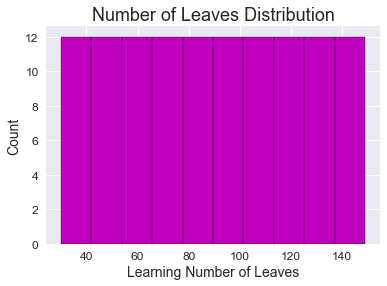

In [62]:
plt.hist(param_grid['num_leaves'], color = 'm', edgecolor = 'k')
plt.xlabel('Learning Number of Leaves', size = 14); plt.ylabel('Count', size = 14); plt.title('Number of Leaves Distribution', size = 18);

In [63]:
params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}
params

{'class_weight': 'balanced',
 'boosting_type': 'goss',
 'num_leaves': 61,
 'learning_rate': 0.053323470492027424,
 'subsample_for_bin': 60000,
 'min_child_samples': 460,
 'reg_alpha': 0.8979591836734693,
 'reg_lambda': 0.42857142857142855,
 'colsample_bytree': 0.7333333333333333}

In [64]:
params['subsample'] = random.sample(subsample_dist, 1)[0] if params['boosting_type'] != 'goss' else 1.0
params

{'class_weight': 'balanced',
 'boosting_type': 'goss',
 'num_leaves': 61,
 'learning_rate': 0.053323470492027424,
 'subsample_for_bin': 60000,
 'min_child_samples': 460,
 'reg_alpha': 0.8979591836734693,
 'reg_lambda': 0.42857142857142855,
 'colsample_bytree': 0.7333333333333333,
 'subsample': 1.0}

In [75]:
# Create a lgb dataset
train_set = lgb.Dataset(data3)

In [76]:
r = lgb.cv(params, train_set, num_boost_round = 10000, nfold = 10, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 50)

# Highest score
r_best = np.max(r['auc-mean'])

# Standard deviation of best score
r_best_std = r['auc-stdv'][np.argmax(r['auc-mean'])]

print('The maximium ROC AUC on the validation set was {:.5f} with std of {:.5f}.'.format(r_best, r_best_std))
print('The ideal number of iterations was {}.'.format(np.argmax(r['auc-mean']) + 1))

The maximium ROC AUC on the validation set was 1.00000 with std of 0.00000.
The ideal number of iterations was 1.


In [79]:
random_results = pd.DataFrame(columns = ['loss', 'params', 'iteration', 'estimators', 'time'],
                       index = list(range(MAX_EVALS)))

In [80]:
def random_objective(params, iteration, n_folds = N_FOLDS):
    """Random search objective function. Takes in hyperparameters
       and returns a list of results to be saved."""

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    end = timer()
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)
    
    # Return list of results
    return [loss, params, iteration, n_estimators, end - start]

In [83]:
#%%capture

random.seed(50)

# Iterate through the specified number of evaluations
for i in range(MAX_EVALS):
    
    # Randomly sample parameters for gbm
    params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}
    
    print(params)
    
    if params['boosting_type'] == 'goss':
        # Cannot subsample with goss
        params['subsample'] = 1.0
    else:
        # Subsample supported for gdbt and dart
        params['subsample'] = random.sample(subsample_dist, 1)[0]
        
        
    results_list = random_objective(params, i)
    
    # Add results to next row in dataframe
    random_results.loc[i, :] = results_list


{'class_weight': 'balanced', 'boosting_type': 'goss', 'num_leaves': 76, 'learning_rate': 0.055533968216953146, 'subsample_for_bin': 80000, 'min_child_samples': 460, 'reg_alpha': 0.6122448979591836, 'reg_lambda': 1.0, 'colsample_bytree': 0.8222222222222222}


NameError: name 'timer' is not defined